<a href="https://colab.research.google.com/github/SrivinaySridhar/MLT_workshop/blob/main/Linear_Regression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Data

$\mathbf{X}$ is a feature matrix corresponding to $n$ training examples, each represented with $d$ features and has shape $d \times n$.  
\begin{equation}
  \mathbf{X}_{d \times n} = \begin{bmatrix}
       | & | &\dots & |\\
       \mathbf{x}_{1}&  
       \mathbf{x}_{2} &
      \dots &
       \mathbf{x}_{n}  \\
        | & | &\dots & |\\
    \end{bmatrix}
\end{equation}

* here each $\mathbf{x}_i \in \mathbb{R}^d$

*  $\mathbf{y}$ is a label vector of shape $n \times 1$.  
\begin{equation}
    \mathbf{y} = \begin{bmatrix}
        y_{1}  \\
        y_{2} \\
        \vdots  \\
        y_{n} \\
      \end{bmatrix}
\end{equation}

*  The $i$-th entry in this vector, $\mathbf{y}[i]$ gives label for $i$-th example, which is denoted by $y_{i} \in \mathbb{R}$.

### Training data

Generated from a deterministic distribution with Noise ~ Normal(0, 1)

$$y_{train} = 2X^3 + 3X^2 + 4 + Noise$$

In [2]:
rng = np.random.default_rng(seed = 101)

X_train = (np.arange(-2, 2, 0.01).reshape(1, -1))

y_train = (2 * (X_train)**3 + 3 * (X_train)**2 + 4 + rng.normal(0, 1, X_train.shape[1]).reshape(1, -1)).T

In [3]:
X_train.shape, y_train.shape

((1, 400), (400, 1))

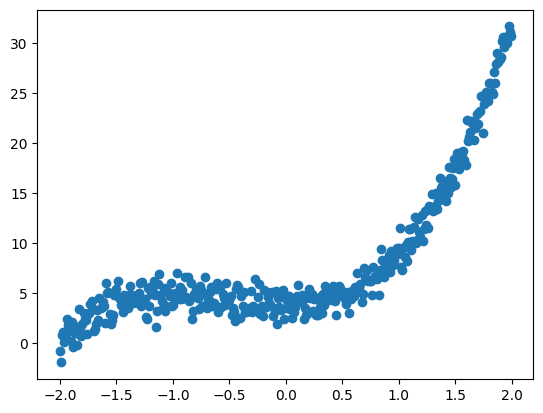

In [4]:
plt.scatter(X_train, y_train);

### Test data

Generated from a deterministic distribution with Noise ~ Normal(0, 2)

$$y_{test} = 2X^3 + 3X^2 + 4 + Noise$$

In [5]:
rng = np.random.default_rng(seed = 102)

X_test = np.arange(-2, 2, 0.02).reshape(1, -1)

y_test = (2 * (X_test)**3 + 3 * (X_test)**2 + 4 + rng.normal(0, 2, X_test.shape[1]).reshape(1, -1)).T

In [6]:
X_test.shape, y_test.shape

((1, 200), (200, 1))

## Model

Linear regression model for the dataset ${\mathbb{x}, y}$ is given as
$$h_w(\mathbb{x}) = w_1x^{1}+w_2x^{2}+...+w_dx^{d} =  \mathbf{x}^Tw
$$

where $x^{i}$ is the $i^{th}$ feature of the data point $\mathbf{x}$ and $w = [w_1, w_2, ...w_d]^T$ is the weight vector.


Notice that above model always pass through the origin but for a given dataset, best fit model need not pass through the origin. To tackle this issue, we add an intercept $w_0$ in the model and set the corresponding featrue $x^{0}$ to $1$. That is

$$h_w(\mathbb{x}) =w_0x^{0}+ w_1x^{1}+w_2x^{2}+...+w_dx^{n} =  \mathbf{x}^Tw
$$

We call $x^{0}$ the dummy feature and set its value to 1 for each examples. Now $w$ is of shape $(d+1, 1)$ and $\mathbf{X}$ is of shape $(d+1, n)$ where the first row of $\mathbf{X}$ has entries as 1.


### Add dummy feature

In [7]:
dummy_feature = np.ones(X_train.shape[1])
X = np.row_stack((dummy_feature, X_train))

In [8]:
X.shape

(2, 400)

Test data

In [9]:
dummy_feature_t = np.ones(X_test.shape[1])
X_t = np.row_stack((dummy_feature_t, X_test))

In [10]:
X_t.shape

(2, 200)

## Loss function

The total loss is the sum of square of errors between actual and predicted labels for each training point.  

The error for $i$-th training point is calculated as follows:
\begin{eqnarray}
e^{(i)} &=& (\mathrm{{actual\ label} - {predicted\ label}})^2 \\
        &=& \left ({y_{i}} -
        {h_{\mathbf{w}}(\mathbf{x}_{i})} \right)^2 \\
        &=& \left ({y_{i}} -
        {\mathbf{w}^T \mathbf{x}_{i}} \right)^2
\end{eqnarray}



The total loss $L(\mathbf{w})$ is sum of errors at each training point:
\begin{equation}
L(\mathbf{w}) = \sum_{i=1}^{n} e^{(i)}
\end{equation}

We divide this by $\frac{1}{2}$ for mathematical convenience in later use:


\begin{eqnarray}
  L(\mathbf{w}) &=& \frac{1}{2} \sum_{i=1}^{n} e^{(i)} \\ &=&  \frac{1}{2} \left({{\mathbf{X}^T \mathbf{w}}} - \mathbf{y} \right)^T \left({{\mathbf{X}^T \mathbf{w}}} - \mathbf{y} \right))
\end{eqnarray}


## Optimization



#### 1. Normal equation

Let's set $\dfrac{\partial L(\mathbf{w})}{\partial \mathbf{w}}$ to 0 and solve for $\mathbf{w}$:
\begin{eqnarray}
\frac{\partial L(\mathbf{w})}{\partial \mathbf{w}} &=& \mathbf{X} \mathbf{X}^T \mathbf{w} - \mathbf{X} \mathbf{y} = 0 \\
\mathbf{X}^T \mathbf{X} \mathbf{w} &=& \mathbf{X}^T \mathbf{Y} \\
\mathbf{w} &=& \left( \mathbf{X} \mathbf{X}^T \right)^{-1} \mathbf{X} \mathbf{y}
\end{eqnarray}



#### Find weight vector and prediction for training and test dataset

In [11]:
### weight
def weights(X, y):
    return np.linalg.pinv(X@(X.T))@X@y

In [12]:
w = weights(X, y_train)
w

array([[7.93982825],
       [4.79910241]])

In [13]:
### Prediction
def pred(X, w):
    return (X.T)@w

In [14]:
# Store the train predictions in y_hat
y_hat = pred(X, w)

In [15]:
# Store the test predictions in y_test_hat
y_test_hat = pred(X_t, w)

### Plot weight vector

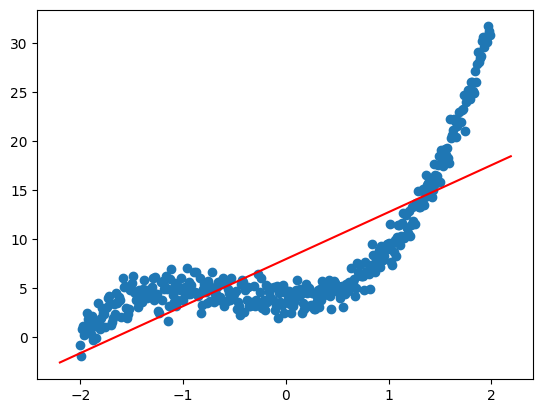

In [16]:
### Plot weight vector
plt.scatter(X_train, y_train)
axes = plt.gca() #Gets coordinate axis

x_values = np.array(axes.get_xlim())
y_values = w[0] + w[1]*x_values

plt.plot(x_values, y_values, 'r-');

## Evaluation

##### RMSE $$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$



In [17]:
### Loss function
def loss(y, y_hat):
    return np.sqrt(np.mean((y - y_hat)**2))

In [18]:
# Training error
loss(y_train, y_hat)

4.477002001803876

In [19]:
# Test error
loss(y_test, y_test_hat)

4.718639896481515

#### 2. Gradient Descent


Gradient of a function $f$ at a point $x$ gives the direction of maximum change in $f$ at the point $x$.

---

We start at a random point $\mathbf{w}$ at the loss function $L(\mathbf{w})$.


We basically need an update rule in gradient descent, which is as follows:

\begin{eqnarray}
\mathbf{w}_{k+1} &:=& \mathbf{w}_k - \alpha{\frac{\partial L(\mathbf{w})}{\partial \mathbf{w}}} \\
   &:=& \mathbf{w}_k - \alpha{\left(\mathbf{X} \mathbf{X}^T \mathbf{w}_{k} - \mathbf{X} \mathbf{y}\right)} \\
\end{eqnarray}

Note that this is the vectorized implementation.  It will make sure that all the parameters are updated in one go through this.


In [20]:
# Gradient calculation
def gradient(X, w, y):
    return (X@X.T)@w - (X@y)

In [21]:
# Gradient descent
def grad_desc(X, y, eta, n_iter):
    w_0 = np.zeros(X.shape[0]).reshape((2,-1))

    for i in range(n_iter):
        w_0 = w_0 - eta * gradient(X, w_0, y)

    return w_0

In [22]:
grad_desc(X, y_train, 0.001, 1000)

array([[7.93982825],
       [4.79910241]])

In [23]:
# Gradient descent output is close to optimum w
w

array([[7.93982825],
       [4.79910241]])

### Number of iterations vs loss (for fixed alpha)

In [24]:
# Plot nunber of iterations vs loss
n_iter_list = [10, 20, 50, 100, 250]
loss_list = []
for n_iter in n_iter_list:
    w = grad_desc(X, y_train, 0.0001, n_iter)
    y_hat = pred(X, w)
    loss_iter = loss(y_train, y_hat)
    loss_list.append(loss_iter)

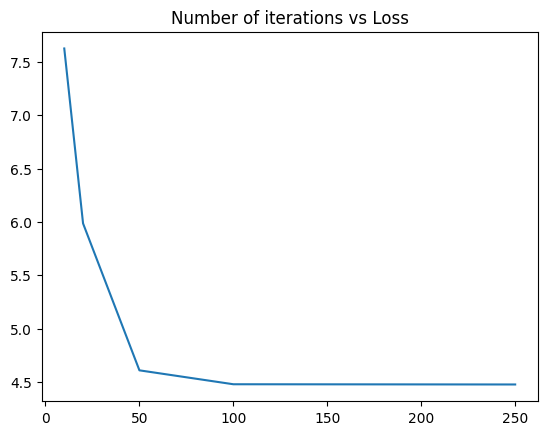

In [25]:
plt.plot(n_iter_list, loss_list)
plt.title("Number of iterations vs Loss");

###SGD:



#### Implementation 1

In [26]:
def SGD_1(X, y, eta, n_iter):
    w_0_list = []
    w_0 = np.zeros(X.shape[0]).reshape((2,-1))
    batches = np.arange(0, X.shape[1], 20)

    for i in range(n_iter):
        indices = np.arange(batches[i%20], batches[i%20] + 20)

        X_batch = X[:, indices]
        y_batch = y[indices]

        w_0 = w_0 - eta*(gradient(X_batch, w_0, y_batch))
        w_0_list.append(w_0[1])

    return w_0, w_0_list

In [27]:
w_star, w_list = SGD_1(X, y_train, 0.001, 100)

In [28]:
print(w_star, '\n')
print(f"Optimum: \n {w}")

[[7.1102333 ]
 [4.98889206]] 

Optimum: 
 [[7.939532  ]
 [4.79909273]]


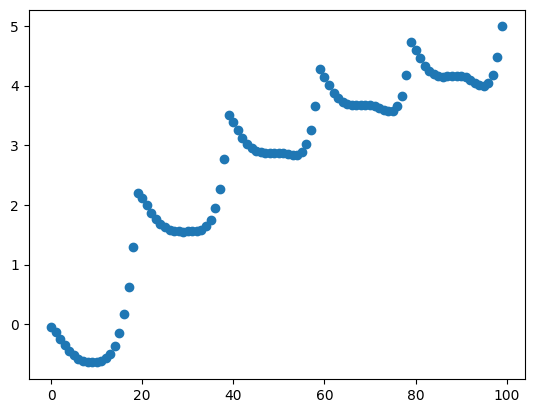

In [29]:
plt.scatter([i for i in range(len(w_list))], w_list);

#### Implementation 2

In [30]:
def SGD_2(X, y, eta, n_iter, batch_size):
    w_0_list = []
    w_0 = np.zeros(X.shape[0]).reshape((2,-1))

    for i in range(n_iter):
        indices = random.sample(range(0, X.shape[1]), batch_size)

        X_batch = X[:, indices]
        y_batch = y[indices]

        w_0 = w_0 - eta*(gradient(X_batch, w_0, y_batch))
        w_0_list.append(w_0[1])

    return w_0, w_0_list

In [31]:
w_star, w_list = SGD_2(X, y_train, 0.001, 1000, 20)

In [32]:
print(w_star, '\n')
print(f"Optimum: \n {w}")

[[7.82459257]
 [4.67107434]] 

Optimum: 
 [[7.939532  ]
 [4.79909273]]


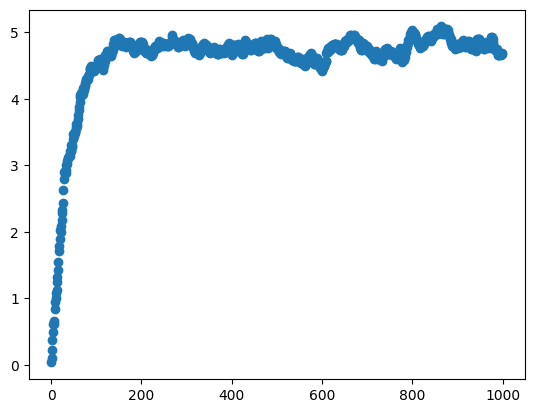

In [33]:
plt.scatter([i for i in range(len(w_list))], w_list);